# Определение перспективного тарифа для телеком-компании

## Описание

Для компании оператора сотовой связи необходимо понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет. Предстоит сделать предварительный анализ тарифов на небольшой выборке в 500 клиентови двум тарифам.

<font color=blue>Описание тарифов</font>.

</div>

<font color=orange>Тариф «Смарт»</font>

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

<font color=orange>Тариф «Ультра»</font>

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<font color=blue>Примечание:</font>

</div>

Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Цель

Проанализировать поведение клиентов и выбрать наилучший тариф.

## Вывод

Из проведенного анализа можно сделать такие выводы:

По тарифам наиболее прибыльным является тариф Смарт, так как пользователи больше используют смс, минут и трафика интернета сверх тарифа. И таких пользователей значительно больше.

## Предварительная обработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from scipy import stats as st
import numpy as np

In [2]:
# прочитаем данные
df_calls = pd.read_csv('calls.csv',  index_col=0)

In [3]:
# напишем фукнцию вывода информации о данных
def info(df):
    display(df.info())
    display(df.describe())
    print('Дубликаты:', df.duplicated().sum())
    display(df.head())    

In [4]:
# посмотрим на данные
info(df_calls)

<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_date  202607 non-null  object 
 1   duration   202607 non-null  float64
 2   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Дубликаты: 8838


,call_date,duration,user_id
id,,,
1000_0,2018-07-25,0.00,1000
1000_1,2018-08-17,0.00,1000
1000_2,2018-06-11,2.85,1000
1000_3,2018-09-21,13.80,1000
1000_4,2018-12-15,5.18,1000


Описание полей:

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [5]:
#удалим дубликаты
df_calls = df_calls.drop_duplicates().reset_index(drop = True)

In [6]:
# проверим дубликаты
df_calls.duplicated().sum()

0

In [7]:
# посмотрим сколько данных
len(df_calls)

193769

В df_calls названия столбцов корректные, Null данных нет, типы данных корректные, среднее и медиана примерно одинаковое, дубликаты удалены, данные годные для анализа. 

In [8]:
# прочитаем на данные об интернет трафике
df_internet = pd.read_csv('internet.csv',  index_col=0)

In [9]:
# посмотрим на данные
info(df_internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Дубликаты: 0


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Описание:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

В df_internet названия столбцов корректные, Null данных нет, типы данных корректные, среднее и медиана примерно одинаковое, дубликатов нет, значит данные годные для анализа. Добавим столбец gb_used — объём потраченного за сессию интернет-трафика (в гигабайтах).

In [10]:
# переведем МБ в ГБ
df_internet['gb_used'] = df_internet['mb_used']/1024

In [11]:
info(df_internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
 4   gb_used       149396 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ MB


None

,mb_used,user_id,gb_used
count,149396.000000,149396.000000,149396.000000
mean,370.192426,1252.099842,0.361516
std,278.300951,144.050823,0.271778
min,0.000000,1000.000000,0.000000
25%,138.187500,1130.000000,0.134949
50%,348.015000,1251.000000,0.339858
75%,559.552500,1380.000000,0.546438
max,1724.830000,1499.000000,1.684404


Дубликаты: 0


,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469


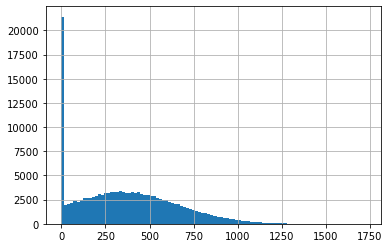

In [12]:
# посмoтрим на распределение данных в mb_used
df_internet['mb_used'].hist(bins=100);

In [13]:
# посмотрим на записи с нулевым значением.
df_internet.loc[df_internet['mb_used']==0]

,id,mb_used,session_date,user_id,gb_used
11,1000_11,0.0,2018-08-28,1000,0.0
38,1000_38,0.0,2018-11-27,1000,0.0
46,1000_46,0.0,2018-06-30,1000,0.0
67,1000_67,0.0,2018-06-16,1000,0.0
72,1000_72,0.0,2018-06-15,1000,0.0
...,...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499,0.0
149381,1499_142,0.0,2018-11-01,1499,0.0
149383,1499_144,0.0,2018-11-27,1499,0.0
149386,1499_147,0.0,2018-10-21,1499,0.0


In [14]:
# такие записи можно исключить, так как они не информативны и не влияют на дальнейшую оценку тарифов
df_internet = df_internet.loc[df_internet['mb_used'] > 0]

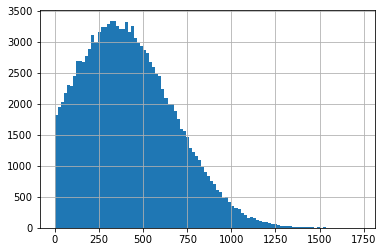

In [15]:
# построим новую гистограмму
df_internet['mb_used'].hist(bins=100);

Наибольшее количество расхода от 250 до 500 МБ. Свыше 1000 МБ менее 500.

до 500 МБ трафика расходуется больше всего, свыше 1000 МБ совсем немного.

In [16]:
# прочитаем данные о сообщениях
df_messages = pd.read_csv('messages.csv')

In [17]:
# посмотрим на данные о сообщениях
info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Дубликаты: 0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Описание полей:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

В df_messages названия столбцов корректные, Null данных нет, типы данных корректные, среднее и медиана примерно одинаковое, дубликатов нет, значит данные годные для анализа. 

In [18]:
# прочитаем данные о тарифах
df_tariffs = pd.read_csv('tariffs.csv')

In [19]:
# посмотрим на данных о тарифах
info(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Дубликаты: 0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В df_tariffs названия столбцов корректные, Null данных нет, типы данных корректные, дубликатов нет, значит данные годные для анализа. Meтод describe можно не смотреть, так как это только тарифы, он больше подходит для данных по пользователям.

In [20]:
# прочитаем данные о пользователях
df_users = pd.read_csv('users.csv')

In [21]:
# посмотрим на данные о пользователях
info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Дубликаты: 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Описание:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [22]:
# заменим пропущенные значения на дату 999999, что равно 9999-12-31 года, так как тариф еще действует
df_users['churn_date'] = df_users['churn_date'].fillna('9999-12-31')

In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  500 non-null    object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В df_users названия столбцов корректные, Null заполнены, типы данных корректные, дубликатов нет, среднее и медиана примерно одинаковое, дубликатов нет, значит данные годные для анализа.

# Посчитаем для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Для подсчета звонков и израсходованных минут  по месяцам выделим месяц из даты звонка call_date. Но прежде поменяем тип на date

In [24]:
# Меняем тип данных на дату
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.head()

,call_date,duration,user_id
0,2018-07-25,0.00,1000
1,2018-08-17,0.00,1000
2,2018-06-11,2.85,1000
3,2018-09-21,13.80,1000
4,2018-12-15,5.18,1000


In [25]:
# выделяем месяц и записываем новый столбец month - месяц звонка
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193769 entries, 0 to 193768
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  193769 non-null  datetime64[ns]
 1   duration   193769 non-null  float64       
 2   user_id    193769 non-null  int64         
 3   month      193769 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.9 MB


In [26]:
# округлим продолжительность звонка duration до большего значения в минутах и запишем в тип int
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls.head()

,call_date,duration,user_id,month
0,2018-07-25,0,1000,7
1,2018-08-17,0,1000,8
2,2018-06-11,3,1000,6
3,2018-09-21,14,1000,9
4,2018-12-15,6,1000,12


In [27]:
# почитаем количество звонков помесячно для каждого пользователясделаем, сводные таблицы
calls = df_calls.pivot_table(index= ['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
calls.head(12)

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
5,1000,10,350
6,1000,11,338
7,1000,12,333
8,1001,11,430
9,1001,12,414


In [28]:
# переименуем duration в count_minutes
calls = calls.rename(columns = {'duration' : 'count_minutes'})

In [29]:
# посмотрим на таблицу messages
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [30]:
# Меняем тип данных на дату
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [31]:
# выделяем месяц и записываем новый столбец month - месяц смс
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
# посчитаем количество израсходованных смс по месяцам, сделаем сводные таблицы
messages = df_messages.pivot_table(index= ['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages.head(12)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [33]:
# переименум id в count_sms
messages = messages.rename(columns = {'id': 'count_sms'})

In [34]:
# посмотрим на таблицу internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            129798 non-null  object 
 1   mb_used       129798 non-null  float64
 2   session_date  129798 non-null  object 
 3   user_id       129798 non-null  int64  
 4   gb_used       129798 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ MB


In [35]:
# меняем тип данных на дату
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
 4   gb_used       129798 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.9+ MB


In [36]:
# выделяем месяц и записываем новый столбец month - месяц интернет сессии
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,1000_4,302.56,2018-09-24,1000,0.295469,9


In [37]:
# посчитаем количество израсходованных гигабайт по месяцам, сделаем сводные таблицы
internet = df_internet.pivot_table(index= ['user_id', 'month'], values='gb_used', aggfunc='sum').reset_index()
internet.head(12)

,user_id,month,gb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
5,1000,10,14.357900
6,1000,11,14.410615
7,1000,12,9.587510
8,1001,11,17.997402
9,1001,12,13.707676


In [38]:
# округлим gb до целого в большую сторону
internet['gb_used'] = np.ceil(internet['gb_used']).astype('int')
internet.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [39]:
# переименуем gb_used в count_gb
internet = internet.rename(columns = {'gb_used': 'count_gb'})
internet.head()

,user_id,month,count_gb
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


Объединим таблицы users, calls, messages, internet по user_id и tariffs по tariff_name

In [40]:
users_merge = calls.merge(messages, on=['user_id', 'month'], how='outer')  
users_merge.head()

,user_id,month,count_minutes,count_sms
0,1000,5,159.0,22.0
1,1000,6,172.0,60.0
2,1000,7,340.0,75.0
3,1000,8,408.0,81.0
4,1000,9,466.0,57.0


In [41]:
users_merge = users_merge.merge(internet, on=['user_id', 'month'], how='outer')
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0


In [42]:
users_merge = users_merge.merge(df_users[['user_id', 'tariff']] , on='user_id', how='outer')
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb,tariff
0,1000,5.0,159.0,22.0,3.0,ultra
1,1000,6.0,172.0,60.0,23.0,ultra
2,1000,7.0,340.0,75.0,14.0,ultra
3,1000,8.0,408.0,81.0,14.0,ultra
4,1000,9.0,466.0,57.0,15.0,ultra


In [43]:
# переименуем tariff_name в таблице tariffs в tariff
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [44]:
users_merge.head(1)

,user_id,month,count_minutes,count_sms,count_gb,tariff
0,1000,5.0,159.0,22.0,3.0,ultra


In [45]:
# соединим users_merge и df_tariffs по тарифу
users_merge = users_merge.merge(df_tariffs, on='tariff', how='left')
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1


In [46]:
# создадим столбец gb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в гигабайтах)
users_merge['gb_per_month_included'] = users_merge['mb_per_month_included']/1024

Посчитаем количество превышений минут, смс и интернета в ГБ и запишем в столбцы

In [47]:
users_merge['excess_calls'] = users_merge['count_minutes'] - users_merge['minutes_included']

In [48]:
users_merge['excess_messages'] = users_merge['count_sms'] - users_merge['messages_included']

In [49]:
users_merge['excess_internet'] = users_merge['count_gb'] - users_merge['gb_per_month_included']

In [50]:
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,excess_calls,excess_messages,excess_internet
0,1000,5.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2841.0,-978.0,-27.0
1,1000,6.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2828.0,-940.0,-7.0
2,1000,7.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2660.0,-925.0,-16.0
3,1000,8.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2592.0,-919.0,-16.0
4,1000,9.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2534.0,-943.0,-15.0


In [51]:
# напишем функцию для расчета выручки от использования звонков, смс и гб сверх тарифа
# запишем в новый столбец revenue
def revenue(row):
    revenue_by_min = 0
    revenue_by_sms = 0
    revenue_by_gb = 0
    if row['excess_calls'] > 0:
        revenue_by_min = row['excess_calls'] * row['rub_per_minute']
    if row['excess_messages'] > 0:
        revenue_by_sms = row['excess_messages'] * row['rub_per_message']
    if row['excess_internet'] > 0:
        revenue_by_sms = row['excess_internet'] * row['rub_per_gb']
    return revenue_by_min + revenue_by_sms + revenue_by_gb + row['rub_monthly_fee']
users_merge['revenue'] = users_merge.apply(revenue, axis=1)

In [52]:
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,excess_calls,excess_messages,excess_internet,revenue
0,1000,5.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2841.0,-978.0,-27.0,1950.0
1,1000,6.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2828.0,-940.0,-7.0,1950.0
2,1000,7.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2660.0,-925.0,-16.0,1950.0
3,1000,8.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2592.0,-919.0,-16.0,1950.0
4,1000,9.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2534.0,-943.0,-15.0,1950.0


In [53]:
# создадим столбец sum_revenue с полной выручкой, включая абонентскую плату 
users_merge['sum_revenue'] = users_merge['revenue'] + users_merge['rub_monthly_fee']

In [54]:
users_merge.head()

,user_id,month,count_minutes,count_sms,count_gb,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,excess_calls,excess_messages,excess_internet,revenue,sum_revenue
0,1000,5.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2841.0,-978.0,-27.0,1950.0,3900.0
1,1000,6.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2828.0,-940.0,-7.0,1950.0,3900.0
2,1000,7.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2660.0,-925.0,-16.0,1950.0,3900.0
3,1000,8.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2592.0,-919.0,-16.0,1950.0,3900.0
4,1000,9.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,30.0,-2534.0,-943.0,-15.0,1950.0,3900.0


# Анализ данных
- посмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- посчитаем среднее количество, дисперсию и стандартное отклонение. 
- построим гистограммы.

In [55]:
# посчитаем среднее, дисперсию, стандартное отклонение
# для количества минут, смс и гб по каждому тарифу
users_merge_mean = users_merge.pivot_table(index= ['tariff'],\
                                values= ['count_minutes', 'count_sms', 'count_gb'],\
                                aggfunc = ['mean', 'var', 'std']).reset_index()
users_merge_mean

tariff       mean                                 var                \
           count_gb count_minutes  count_sms   count_gb count_minutes   
0  smart  16.343511    418.820513  38.716441  32.818605  35783.909714   
1  ultra  19.714579    545.028391  61.161006  93.844453  93924.008667   

                     std                           
     count_sms  count_gb count_minutes  count_sms  
0   717.594201  5.728752    189.166355  26.787949  
1  2109.659183  9.687335    306.470241  45.931026

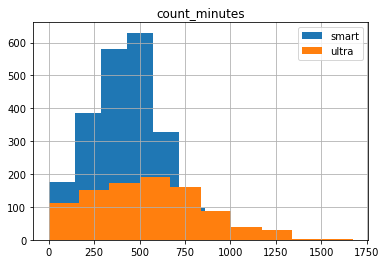

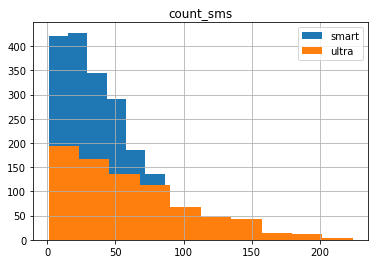

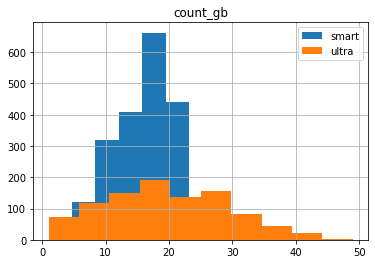

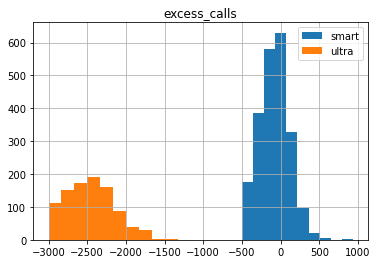

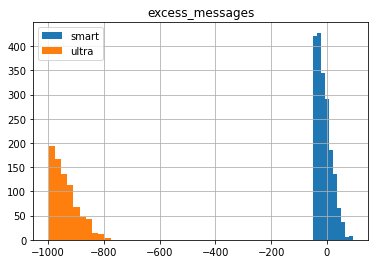

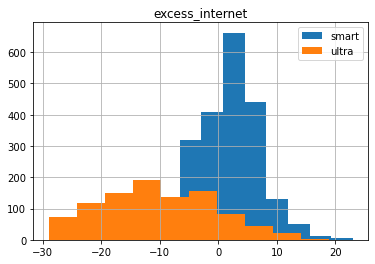

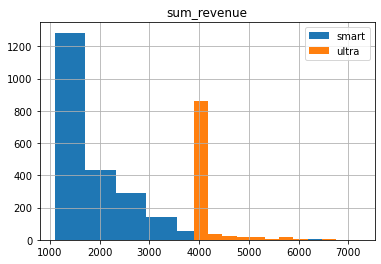

In [56]:
# построим гистограммы для количественных столбцов
for column in ['count_minutes', 'count_sms', 'count_gb', 'excess_calls', 'excess_messages','excess_internet', 'sum_revenue']:
        users_merge.loc[users_merge['tariff'] == 'smart'][column].hist(label='smart')
        users_merge.loc[users_merge['tariff'] == 'ultra'][column].hist(label='ultra')
        plt.title(column)
        plt.legend()
        plt.show();

Вывод.

По графикам видно, что наибольшее количество пользователей используют тариф smart. При этом эти же пользователи имеют больший перерасход минут, смс и ГБ, поэтому и выручка от таких пользователей выше. О чем нам говорит последняя гистограмма. Если брать примерные расчеты, выходит, что ultra: 4000р * 800 =3200000 рублей выручка, smart 1800 * 1200 + 2000 * 400 + 1700 * 250 + 3500 * 100 =3750000 рублей выручка.

# Проверим гипотезы
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая гипотеза.

Нулевая гипотеза в том, что средняя выручка от тарифа Ультра равна средней выручки от тарифа Смарт. В этом случае наша первая гипотеза неверная.

Альтельнативная гипотеза - не равна. В этом случае наша первая гипотеза верная.

Для проверки будем использовать метод scipy.stats.ttest_ind  для проверки гипотезы о равенстве среднего двух генеральных совокупностей. Alpha возьмем раное 5%, как общепринятое пороговое значение.

In [57]:
alpha = .05
results = st.ttest_ind(
    users_merge.loc[users_merge['tariff'] == 'smart']['sum_revenue'], 
    users_merge.loc[users_merge['tariff'] == 'ultra']['sum_revenue'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0
Отвергаем нулевую гипотезу


Вывод:

Альтернативная гипотеза верная, то есть наша первая гипотеза верна: средняя выручка по тарифам различается.

**2 гипотеза:**

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза -
средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотеза -
средняя выручка пользователей из Москвы неравна средней выручке пользователей из других регионов.

In [58]:
# добавим в таблицу столбец city из таблицы users 
users_merge = users_merge.merge(df_users[['user_id', 'city']], on='user_id')

In [59]:
alpha = .05
results = st.ttest_ind(
    users_merge.loc[users_merge['city'] == 'Москва']['sum_revenue'], 
    users_merge.loc[users_merge['city'] != 'Москва']['sum_revenue'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.016722409604655843
Отвергаем нулевую гипотезу


Вывод:

Альтернативная гипотеза верная, значит принимаем нашу вторую гипотезу о том, что средняя выручка Москвы отличается от других городов.

# Вывод

Из проведенного анализа можно сделать такие выводы:

По тарифам наиболее прибыльным является тариф Смарт, так как пользователи больше используют смс, минут и трафика интернета сверх тарифа. И таких пользователей значительно больше.

По графикам видно, что наибольшее количество пользователей используют тариф smart. При этом эти же пользователи имеют больший перерасход минут, смс и ГБ, поэтому и выручка от таких пользователей выше. О чем нам говорит последняя гистограмма сравнения выручки по тарифам:
- ultra примерно 4000р * 800 =3200000р, 
- smart 1800 * 1200 + 2000 * 400 + 1700 * 250 + 3500 * 100 =3750000р

Таким образом тариф Смарт выгоднее для оператора.

По гипотезам:

Обе наши гипотезы оказались верными, то есть средние выручки по тарифам различаются, и по столице и другим городам также они отличаются.